In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 
import copy

## Combining Regions to Data ##

In [28]:
happy = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv")
country = pd.read_csv("/Users/Rebecca/Documents/Stats131/Final Project/countries.csv")

In [29]:
country_name = happy['Country name'].unique()
country_name = pd.DataFrame(country_name)
country_name.columns = ['Country']

country = country[['Country','Region']]

In [30]:
country_name['Country'] = country_name['Country'].astype(str)
country['Country'] = country['Country'].astype(str)
country_name['Country'] = country_name['Country'].str.strip()
country['Country'] = country['Country'].str.strip()

inner = pd.merge(left=country_name, right=country, left_on="Country", right_on = "Country", how='left')
inner

happy_final = pd.merge(left=happy, right=inner, left_on='Country name', right_on = 'Country', how='left')
happy_final.head()
#happy_final.to_csv("/Users/Rebecca/Downloads/happy_region.csv")

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Country,Region
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,ASIA (EX. NEAR EAST)
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,ASIA (EX. NEAR EAST)
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,ASIA (EX. NEAR EAST)
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,ASIA (EX. NEAR EAST)
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,ASIA (EX. NEAR EAST)


## Linear Regression Model ##

In [34]:
happy = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_final.csv")
happy_test = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv")

In [35]:
happy = happy.drop(['Unnamed: 0','Standard deviation of ladder by country-year','Region'], axis=1)
happy_test = happy_test[['Country name','Year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Confidence in national government','Democratic Quality','Delivery Quality']]
happy_test = happy_test.loc[happy_test.Year == 2018]

happy.set_index('Country name', inplace=True)
happy_test.set_index('Country name', inplace=True)

In [36]:
happy

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
Country name,,,,,,,,,,,,,
Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808
Albania,2017,4.639548,9.376145,0.637698,68.400002,0.749611,-0.032643,0.876135,0.669241,0.333884,0.457738,0.299945,-0.130315
Algeria,2017,5.248912,9.540639,0.806754,65.699997,0.436670,-0.191522,0.699774,0.641980,0.288710,0.324916,-0.927691,-0.816839
Argentina,2017,6.039330,9.848709,0.906699,68.599998,0.831966,-0.182600,0.841052,0.809423,0.291717,0.305430,0.351304,-0.158056
Armenia,2017,4.287736,9.081095,0.697925,66.599998,0.613697,-0.133958,0.864683,0.625014,0.437149,0.246901,-0.633139,-0.132939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2017,5.070751,9.439296,0.895879,66.300003,0.635505,-0.206035,0.843969,0.725643,0.362985,0.241124,-1.195530,-1.744199
Vietnam,2017,5.175279,8.727759,0.827595,67.699997,0.875556,0.015538,0.784404,0.636681,0.208255,0.848363,-0.548213,-0.227277
Yemen,2017,3.253560,6.871091,0.789555,55.900002,0.595191,-0.061641,0.833238,0.455182,0.295064,0.372836,-2.326562,-1.678789


In [37]:
happy_test

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
Country name,,,,,,,,,,,,,
Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666,NaN,NaN
Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,NaN,NaN
Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN,NaN,NaN
Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,NaN,NaN
Armenia,2018,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2018,5.005663,9.270281,0.886882,66.500000,0.610855,-0.176156,0.827560,0.759221,0.373658,0.260700,NaN,NaN
Vietnam,2018,5.295547,8.783416,0.831945,67.900002,0.909260,-0.039124,0.808423,0.692222,0.191061,NaN,NaN,NaN
Yemen,2018,3.057514,NaN,0.789422,56.700001,0.552726,NaN,0.792587,0.461114,0.314870,0.308151,NaN,NaN


In [39]:
training = happy.drop(['Year','Democratic Quality','Delivery Quality'], axis=1)
testing = happy_test.drop(['Year','Democratic Quality','Delivery Quality'], axis=1).dropna()

X_train = training.loc[:, training.columns != 'Life Ladder']
y_train = training['Life Ladder']

X_test = testing.loc[:, testing.columns != 'Life Ladder']
y_test = testing['Life Ladder']

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(model.coef_))], axis=1)
coefficients.columns = ['Variable','Coefficient']

print("The intercept: ",model.intercept_)
print(coefficients,"\n")

The intercept:  -1.2132434884355048
                            Variable  Coefficient
0                 Log GDP per capita     0.251194
1                     Social support     2.248592
2   Healthy life expectancy at birth     0.021384
3       Freedom to make life choices     2.057634
4                         Generosity     0.535375
5          Perceptions of corruption    -1.001317
6                    Positive affect     1.266704
7                    Negative affect     0.259851
8  Confidence in national government    -1.347788 



It seems like the variables __Social support__, __Freedom to make life choices__, and __Confidence in national government__ are the most important predictors.

In [41]:
predictions = model.predict(X_test)

In [42]:
# Our R-squared
print(model.score(X_test, y_test))

# Our MSE
mse = mean_squared_error(y_test,predictions)
print(mse)

0.7468789691507919
0.31385296519717554


## Top 20 Predicted vs. Actual ##

In [43]:
testing['predicted'] = predictions
testing.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,predicted
Country name,,,,,,,,,,,
Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666,2.880654
Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,5.355503
Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,6.289237
Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,5.194396
Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,7.099399


In [44]:
with pd.option_context('display.max_rows', None): print(testing.sort_values(by='predicted',ascending=False)['predicted'])

Country name
Sweden                    7.265916
Norway                    7.244304
Denmark                   7.215295
New Zealand               7.192378
Finland                   7.108835
Australia                 7.099399
Canada                    7.037815
Netherlands               7.025902
United Kingdom            7.003981
Ireland                   6.979617
Austria                   6.813377
Switzerland               6.784123
United States             6.752738
Germany                   6.670941
Luxembourg                6.649614
France                    6.646809
Slovenia                  6.632075
Uruguay                   6.582537
Estonia                   6.550405
Panama                    6.505017
Belgium                   6.480907
Costa Rica                6.349714
Argentina                 6.289237
Spain                     6.263121
Chile                     6.253906
Japan                     6.219893
Mexico                    6.178566
Colombia                  6.147093
Italy  

In [45]:
# predicted Top 20 Countries
testing = testing.sort_values(by='predicted',ascending=False)
predict_sorted = testing[0:20]

# actual Top 20 Countries
actual_sorted = testing.sort_values(by='Life Ladder',ascending=False)
actual_sorted = actual_sorted[0:20]

In [51]:
print("-------------------------")
print("Predicted Top 20 Countries:")
print(predict_sorted['Life Ladder'])
print("-------------------------")

-------------------------
Predicted Top 20 Countries:
Country name
Sweden            7.374792
Norway            7.444262
Denmark           7.648786
New Zealand       7.370286
Finland           7.858107
Australia         7.176993
Canada            7.175497
Netherlands       7.463097
United Kingdom    7.233445
Ireland           6.962336
Austria           7.396002
Switzerland       7.508587
United States     6.882685
Germany           7.118364
Luxembourg        7.242631
France            6.665904
Slovenia          6.249419
Uruguay           6.371715
Estonia           6.091302
Panama            6.281434
Name: Life Ladder, dtype: float64
-------------------------


In [50]:
print("-------------------------")
print("Actual Top 20 Countries:")
print(actual_sorted['Life Ladder'])
print("-------------------------")

-------------------------
Actual Top 20 Countries:
Country name
Finland           7.858107
Denmark           7.648786
Switzerland       7.508587
Netherlands       7.463097
Norway            7.444262
Austria           7.396002
Sweden            7.374792
New Zealand       7.370286
Luxembourg        7.242631
United Kingdom    7.233445
Australia         7.176993
Canada            7.175497
Costa Rica        7.141075
Germany           7.118364
Czech Republic    7.034165
Ireland           6.962336
Israel            6.927179
Belgium           6.892172
United States     6.882685
France            6.665904
Name: Life Ladder, dtype: float64
-------------------------


In [49]:
print("-------------------------")
print("Difference between the two:")
print(pd.concat([predict_sorted, actual_sorted]).drop_duplicates(keep=False)['Life Ladder'])
print("-------------------------")

-------------------------
Difference between the two:
Country name
Slovenia          6.249419
Uruguay           6.371715
Estonia           6.091302
Panama            6.281434
Costa Rica        7.141075
Czech Republic    7.034165
Israel            6.927179
Belgium           6.892172
Name: Life Ladder, dtype: float64
-------------------------


## Bottom 20 Predicted vs. Actual ##

In [52]:
with pd.option_context('display.max_rows', None): print(testing.sort_values(by='predicted',ascending=True)['predicted'])

Country name
Afghanistan               2.880654
Sierra Leone              3.599861
Chad                      3.636145
Benin                     3.817830
Malawi                    3.942207
Togo                      4.024911
Liberia                   4.044327
Ethiopia                  4.064517
Madagascar                4.074094
Haiti                     4.108714
Niger                     4.126184
Burkina Faso              4.184110
Ivory Coast               4.207281
Comoros                   4.268740
Guinea                    4.322982
Senegal                   4.326441
Cameroon                  4.326711
Mozambique                4.348115
Congo (Brazzaville)       4.403004
Tanzania                  4.440969
Mali                      4.452683
Uganda                    4.494313
Zimbabwe                  4.532621
Pakistan                  4.569335
Bangladesh                4.604129
Mauritania                4.628821
Zambia                    4.647203
Nepal                     4.664187
India  

In [60]:
# predicted Bottom 20 Countries
testing = testing.sort_values(by='predicted',ascending=True)
predict_sorted = testing[:20]

# actual Bottom 20 Countries
actual_sorted = testing.sort_values(by='Life Ladder',ascending=True)
actual_sorted = actual_sorted[:20]

In [61]:
print("-------------------------")
print("Predicted Bottom 20 Countries:")
print(predict_sorted['Life Ladder'])
print("-------------------------")

-------------------------
Predicted Bottom 20 Countries:
Country name
Afghanistan            2.694303
Sierra Leone           4.305683
Chad                   4.486325
Benin                  5.819827
Malawi                 3.334634
Togo                   4.022895
Liberia                4.134853
Ethiopia               4.379262
Madagascar             4.070587
Haiti                  3.614928
Niger                  5.164007
Burkina Faso           4.927236
Ivory Coast            5.268375
Comoros                3.972820
Guinea                 5.252227
Senegal                4.769377
Cameroon               5.250738
Mozambique             4.653714
Congo (Brazzaville)    5.490214
Tanzania               3.445023
Name: Life Ladder, dtype: float64
-------------------------


In [62]:
print("-------------------------")
print("Actual Bottom 20 Countries:")
print(actual_sorted['Life Ladder'])
print("-------------------------")

-------------------------
Actual Bottom 20 Countries:
Country name
Afghanistan     2.694303
Malawi          3.334634
Tanzania        3.445023
Botswana        3.461366
Rwanda          3.561047
Haiti           3.614928
Zimbabwe        3.616480
India           3.818069
Comoros         3.972820
Togo            4.022895
Zambia          4.041488
Madagascar      4.070587
Liberia         4.134853
Iran            4.278118
Sierra Leone    4.305683
Mauritania      4.313615
Uganda          4.321715
Ethiopia        4.379262
Sri Lanka       4.400223
Myanmar         4.410633
Name: Life Ladder, dtype: float64
-------------------------


In [63]:
print("-------------------------")
print("Difference between the two:")
print(pd.concat([predict_sorted, actual_sorted]).drop_duplicates(keep=False)['Life Ladder'])
print("-------------------------")

-------------------------
Difference between the two:
Country name
Chad                   4.486325
Benin                  5.819827
Niger                  5.164007
Burkina Faso           4.927236
Ivory Coast            5.268375
Guinea                 5.252227
Senegal                4.769377
Cameroon               5.250738
Mozambique             4.653714
Congo (Brazzaville)    5.490214
Botswana               3.461366
Rwanda                 3.561047
Zimbabwe               3.616480
India                  3.818069
Zambia                 4.041488
Iran                   4.278118
Mauritania             4.313615
Uganda                 4.321715
Sri Lanka              4.400223
Myanmar                4.410633
Name: Life Ladder, dtype: float64
-------------------------


In predicted: 

In actual: 

## 5 Countries Comparison ##

We will be comparing and analyzing 5 specific countries:

- USA
- Korea
- Finland
- Afghanistan
- Brazil

In [69]:
happy_clean = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/happy_2017_clean.csv")

In [73]:
happy_clean = happy_clean.drop(['Unnamed: 0','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','gini of household income reported in Gallup, by wp5-year'], axis=1)
happy_clean = happy_clean.set_index('Country name')

In [74]:
country_2017 = happy_clean.loc[['United States','South Korea','Finland','Afghanistan','Brazil']]

In [75]:
country_2017

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
Country name,,,,,,,,,,,,,
United States,2017,6.991759,10.900906,0.921003,68.400002,0.868497,0.188833,0.681191,0.826555,0.268269,0.386535,0.677056,1.552135
South Korea,2017,5.873887,10.489561,0.806930,73.300003,0.538114,0.009391,0.850690,0.623378,0.234826,0.358582,0.514762,0.957987
Finland,2017,7.788252,10.611172,0.963826,71.800003,0.962199,-0.005696,0.192413,0.787137,0.176066,0.597539,1.311007,1.999900
Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808
Brazil,2017,6.332929,9.554174,0.904694,66.199997,0.764793,-0.184548,0.794457,0.715945,0.307717,0.165490,0.023793,-0.304572


In [123]:
country_2017.drop('Year',axis=1).describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.929709,9.810713,0.817467,66.500001,0.712123,-0.020844,0.694629,0.689873,0.271641,0.353865,0.128010,0.553528
std,1.963899,1.387955,0.191389,8.150462,0.224351,0.141644,0.297573,0.132943,0.073722,0.161665,1.216541,1.410190
min,2.661718,7.497755,0.490880,52.799999,0.427011,-0.184548,0.192413,0.496349,0.176066,0.165490,-1.886566,-1.437808
25%,5.873887,9.554174,0.806930,66.199997,0.538114,-0.112198,0.681191,0.623378,0.234826,0.261179,0.023793,-0.304572
50%,6.332929,10.489561,0.904694,68.400002,0.764793,-0.005696,0.794457,0.715945,0.268269,0.358582,0.514762,0.957987
75%,6.991759,10.611172,0.921003,71.800003,0.868497,0.009391,0.850690,0.787137,0.307717,0.386535,0.677056,1.552135
max,7.788252,10.900906,0.963826,73.300003,0.962199,0.188833,0.954393,0.826555,0.371326,0.597539,1.311007,1.999900


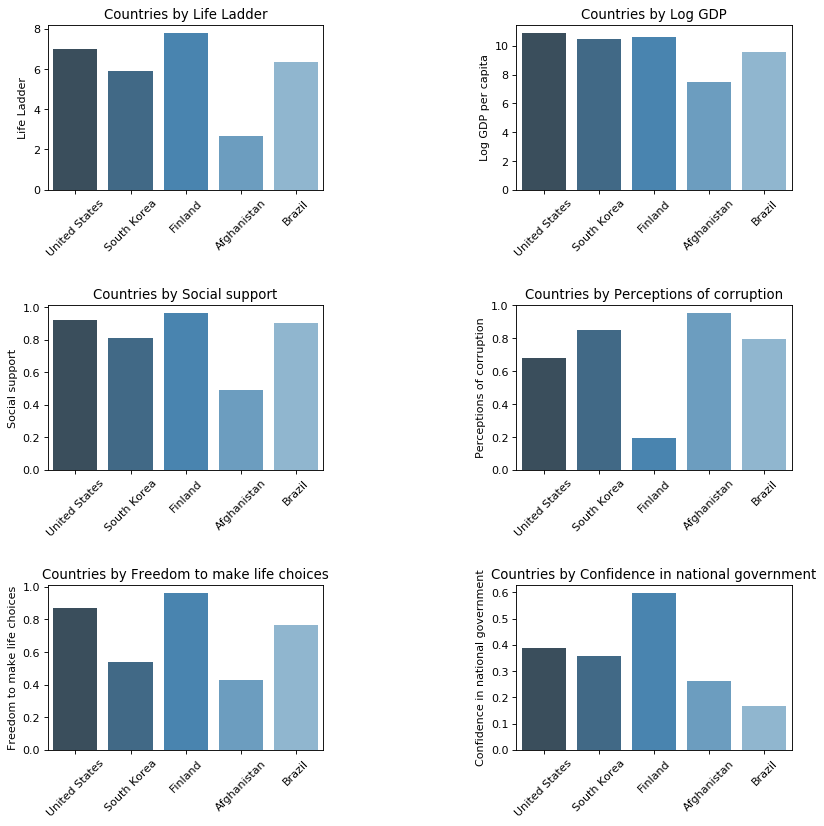

In [121]:
x = range(5)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.7)

plt.subplot(3,2,1)
ax = sns.barplot(x=country_2017.index.values, y='Life Ladder', data=country_2017, palette="Blues_d")
ax.set_title('Countries by Life Ladder')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,2)
ax = sns.barplot(x=country_2017.index.values, y='Log GDP per capita', data=country_2017, palette="Blues_d")
ax.set_title('Countries by Log GDP')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,3)
ax = sns.barplot(x=country_2017.index.values, y='Social support', data=country_2017, palette="Blues_d")
ax.set_title('Countries by Social support')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,4)
ax = sns.barplot(x=country_2017.index.values, y='Perceptions of corruption', data=country_2017, palette="Blues_d")
ax.set_title('Countries by Perceptions of corruption')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,5)
ax = sns.barplot(x=country_2017.index.values, y='Freedom to make life choices', data=country_2017, palette="Blues_d")
ax.set_title('Countries by Freedom to make life choices')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(3,2,6)
ax = sns.barplot(x=country_2017.index.values, y='Confidence in national government', data=country_2017, palette="Blues_d")
ax.set_title('Countries by Confidence in national government')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

Trend over time for these 5 countries

In [148]:
five_countries = pd.read_csv("https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv")

In [149]:
five_countries.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
five_countries = five_countries[['Country name','Year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality']]

five_countries = five_countries.set_index('Country name')
five_countries = five_countries.loc[['United States','South Korea','Finland','Afghanistan','Brazil']]

In [157]:
five_countries.drop('Year',axis=1).groupby(five_countries.index).describe()

Life Ladder                                                    \
                    count      mean       std       min       25%       50%   
Country name                                                                  
Afghanistan          11.0  3.705495  0.664635  2.661718  3.351498  3.782938   
Brazil               13.0  6.673208  0.310859  6.190922  6.374817  6.660004   
Finland              11.0  7.554010  0.179375  7.354225  7.406737  7.447926   
South Korea          13.0  5.879054  0.392424  5.332178  5.767276  5.840231   
United States        13.0  7.106175  0.193551  6.803600  6.991759  7.151114   

                                  Log GDP per capita             ...  \
                    75%       max              count       mean  ...   
Country name                                                     ...   
Afghanistan    4.101512  4.758381               11.0   7.440942  ...   
Brazil         6.980999  7.140283               13.0   9.563974  ...   
Finland        7.671538  7.858107               11.0  10.602655  ...   
South Korea    5.970564  6.946599               13.0  10.361854  ...   
United States  7.181794  7.512688               13.0  10.848201  ...   

              Democratic Quality           Delivery Quality            \
                             75%       max            count      mean   
Country name                                                            
Afghanistan            -1.847129 -1.773257             10.0 -1.476524   
Brazil                  0.216098  0.344150             12.0 -0.112595   
Finland                 1.473369  1.500731             10.0  2.025329   
South Korea             0.557423  0.633008             12.0  0.895332   
United States           0.866820  0.897015             12.0  1.485319   

                                                                           
                    std       min       25%       50%       75%       max  
Country name                                                               
Afghanistan    0.140071 -1.655084 -1.616937 -1.420943 -1.395294 -1.291594  
Brazil         0.114235 -0.304572 -0.186088 -0.118612 -0.043379  0.063088  
Finland        0.033430  1.975339  1.997745  2.039122  2.052543  2.059123  
South Korea    0.068373  0.753288  0.863986  0.912245  0.949550  0.957987  
United States  0.051780  1.415544  1.446079  1.472700  1.540881  1.559145  

[5 rows x 96 columns]

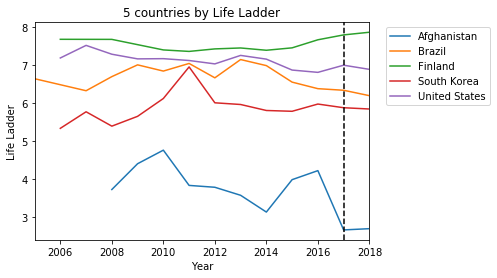

In [185]:
fig, ax= plt.subplots()
for label, grp in five_countries.groupby(five_countries.index):
    grp.plot(x='Year', y='Life Ladder', ax=ax, label=label)
ax.axvline(x=2017, color='black', ls='--')
plt.ylabel('Life Ladder')
plt.legend(loc='upper right', bbox_to_anchor=(1.375, 1))
plt.title('5 countries by Life Ladder')
plt.show()

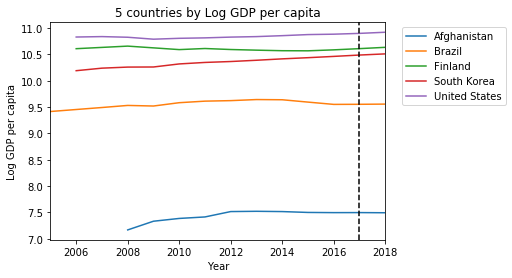

In [183]:
fig, ax= plt.subplots()
for label, grp in five_countries.groupby(five_countries.index):
    grp.plot(x='Year', y='Log GDP per capita', ax=ax, label=label)
ax.axvline(x=2017, color='black', ls='--')
plt.ylabel('Log GDP per capita')
plt.legend(loc='upper right', bbox_to_anchor=(1.375, 1))
plt.title('5 countries by Log GDP per capita')
plt.show()

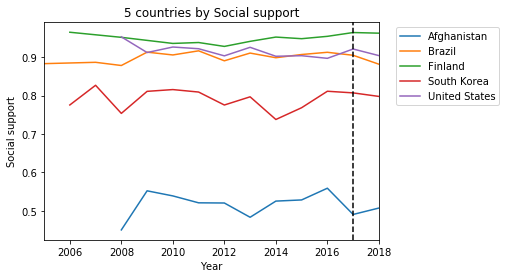

In [184]:
fig, ax= plt.subplots()
for label, grp in five_countries.groupby(five_countries.index):
    grp.plot(x='Year', y='Social support', ax=ax, label=label)
ax.axvline(x=2017, color='black', ls='--')
plt.ylabel('Social support')
plt.legend(loc='upper right', bbox_to_anchor=(1.375, 1))
plt.title('5 countries by Social support')
plt.show()

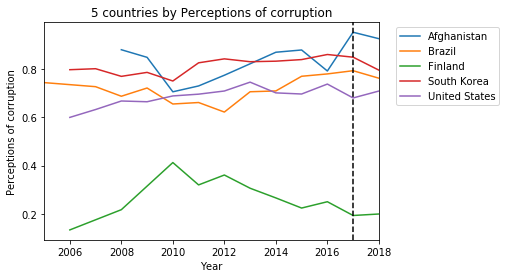

In [181]:
fig, ax= plt.subplots()
for label, grp in five_countries.groupby(five_countries.index):
    grp.plot(x='Year', y='Perceptions of corruption', ax=ax, label=label)
ax.axvline(x=2017, color='black', ls='--')
plt.ylabel('Perceptions of corruption')
plt.legend(loc='upper right', bbox_to_anchor=(1.375, 1))
plt.title('5 countries by Perceptions of corruption')
plt.show()